<a href="https://colab.research.google.com/github/Prajith3/SIT719/blob/main/SIT719_Prac05_Task02_HD_task_sample__done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: DECLARE THE MODULES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [ ]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1255ac9190c8c96b21b63f8725b7dd9f67beeea148d908c178d3f7e530729ad7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
DataSet

'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print(nominal_cols)
print('\n')
print(binary_cols)
print('\n')
print(numeric_cols)


['protocol_type', 'service', 'flag']


['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
print(category)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])


defaultdict(<class 'list'>, {})


In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)





In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)


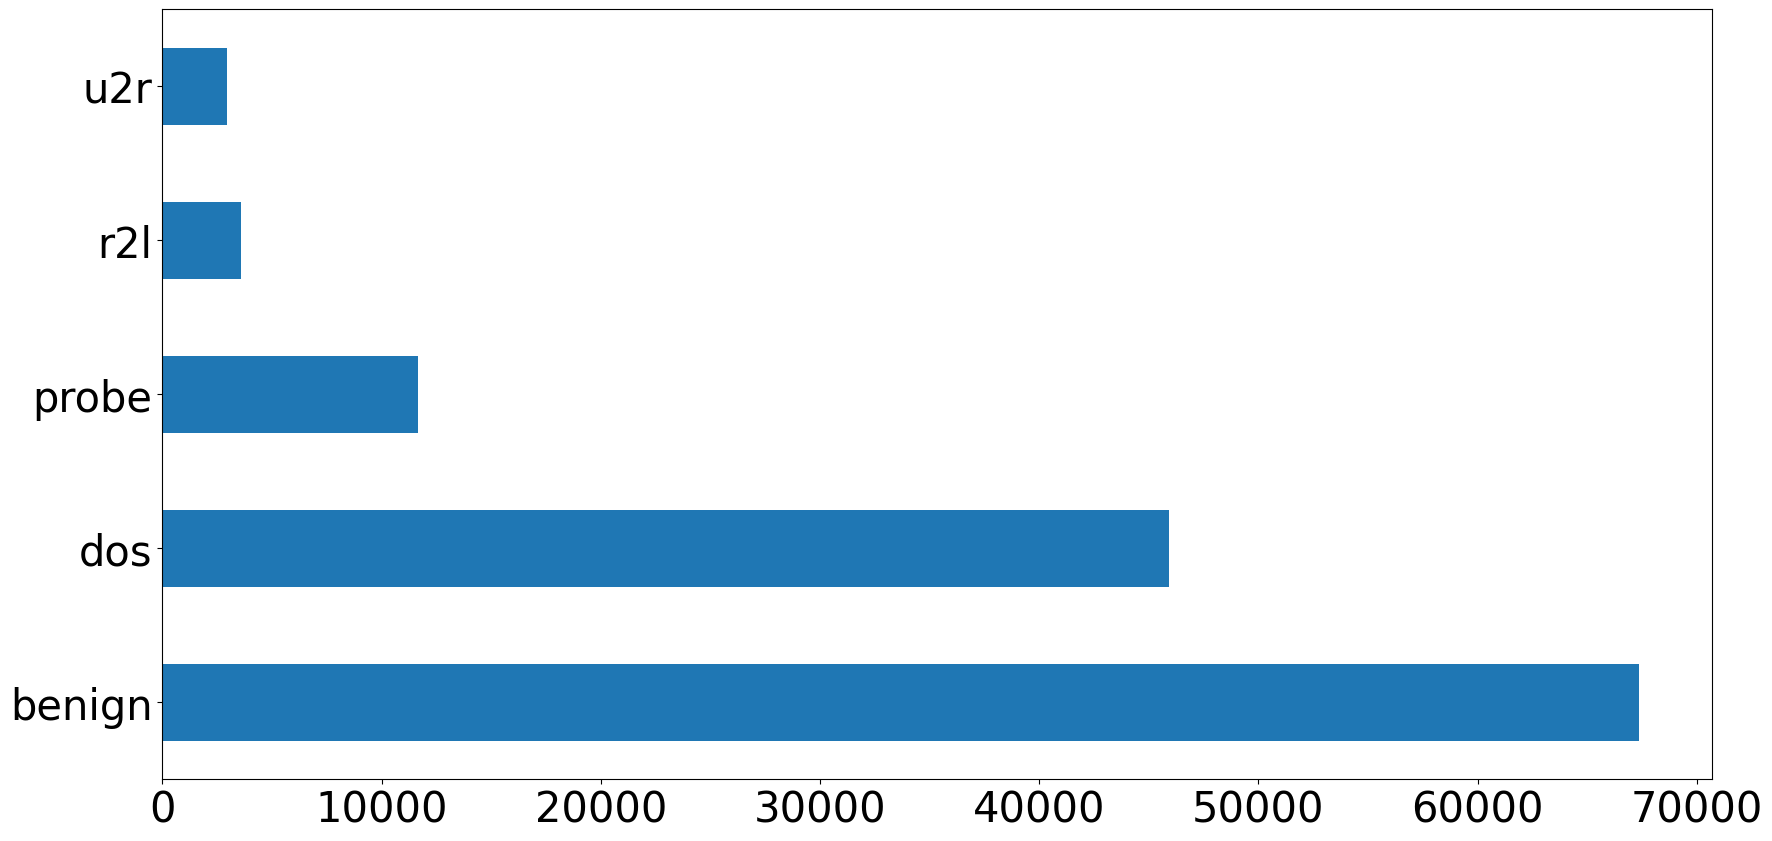

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
# 5-class classification version - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define a dictionary to store the classifiers and their names
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=2023),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=2023),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=2023)
}

# Iterate through classifiers, train, predict, and evaluate
results = {}

for clf_name, clf in classifiers.items():
    clf.fit(train_x, train_Y)
    pred_y = clf.predict(test_x)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test_Y, pred_y)

    # Calculate performance measures
    precision = precision_score(test_Y, pred_y, average='weighted') * 100
    recall = recall_score(test_Y, pred_y, average='weighted') * 100
    f1 = f1_score(test_Y, pred_y, average='weighted') * 100
    accuracy = accuracy_score(test_Y, pred_y) * 100

    results[clf_name] = {
        'Confusion Matrix': conf_matrix,
        'Precision (%)': precision,
        'Recall (%)': recall,
        'F-Score (%)': f1,
        'Accuracy (%)': accuracy
    }

# Print the results for each classifier
for clf_name, clf_result in results.items():
    print(f"Classifier: {clf_name}")
    print(f"Confusion Matrix:\n{clf_result['Confusion Matrix']}")
    print(f"Precision: {clf_result['Precision (%)']:.2f}%")
    print(f"Recall: {clf_result['Recall (%)']:.2f}%")
    print(f"F-Score: {clf_result['F-Score (%)']:.2f}%")
    print(f"Accuracy: {clf_result['Accuracy (%)']:.2f}%")
    print()


Classifier: Decision Tree
Confusion Matrix:
[[9438   60  210    2    1]
 [1540 6000   96    0    0]
 [ 679  219 1525    0    0]
 [1980    0   13  231  350]
 [ 173    0    5    6   16]]
Precision: 81.74%
Recall: 76.34%
F-Score: 73.38%
Accuracy: 76.34%

Classifier: Logistic Regression
Confusion Matrix:
[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]
Precision: 80.09%
Recall: 75.31%
F-Score: 71.54%
Accuracy: 75.31%

Classifier: Random Forest
Confusion Matrix:
[[9459   67  184    0    1]
 [1886 5728   22    0    0]
 [ 797  163 1463    0    0]
 [2450    0    1  121    2]
 [ 189    0    2    3    6]]
Precision: 81.27%
Recall: 74.42%
F-Score: 70.57%
Accuracy: 74.42%

Classifier: SVM
Confusion Matrix:
[[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]
Precision: 81.50%
Recall: 74.63%
F-Score: 71.33%
Accuracy: 74.6

In [ ]:
import pandas as pd

# Define attack classes
attack_classes = ['DoS', 'Normal', 'R2L', 'U2R', 'Probe']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Algorithm', 'Attack Class', 'Precision (%)', 'Recall (%)', 'F-Score (%)', 'False Alarm - FPR (%)'])

# Iterate through classifiers
for clf_name, clf_result in results.items():
    # Iterate through attack classes
    for attack_class in attack_classes:
        # Calculate Precision, Recall, F-Score, and False Alarm - FPR for the current attack class
        true_positive = clf_result['Confusion Matrix'][attack_classes.index(attack_class)][attack_classes.index(attack_class)]
        false_positive = clf_result['Confusion Matrix'][:, attack_classes.index(attack_class)].sum() - true_positive
        false_negative = clf_result['Confusion Matrix'][attack_classes.index(attack_class)].sum() - true_positive
        precision = (true_positive / (true_positive + false_positive)) * 100
        recall = (true_positive / (true_positive + false_negative)) * 100
        f_score = (2 * precision * recall) / (precision + recall)
        total_actual = clf_result['Confusion Matrix'][attack_classes.index(attack_class)].sum()
        false_positive_rate = (false_positive / (false_positive + total_actual - true_positive)) * 100

        # Append the results to the DataFrame
        results_df = results_df.append({
            'Algorithm': clf_name,
            'Attack Class': attack_class,
            'Precision (%)': precision,
            'Recall (%)': recall,
            'F-Score (%)': f_score,
            'False Alarm - FPR (%)': false_positive_rate
        }, ignore_index=True)

# Pivot the DataFrame to create separate tables for each algorithm
for clf_name in classifiers.keys():
    clf_results = results_df[results_df['Algorithm'] == clf_name]
    clf_results.drop('Algorithm', axis=1, inplace=True)

    print(f"Results for {clf_name}:")
    print(clf_results)
    print()


Results for Decision Tree:
  Attack Class  Precision (%)  Recall (%)  F-Score (%)  False Alarm - FPR (%)
0          DoS      68.341781   97.188755    80.251690              94.122713
1       Normal      95.556617   78.575170    86.237873              14.569191
2          R2L      82.477015   62.938506    71.395131              26.513912
3          U2R      96.652720    8.974359    16.423747               0.340281
4        Probe       4.359673    8.000000     5.643739              65.607477

Results for Logistic Regression:
  Attack Class  Precision (%)  Recall (%)  F-Score (%)  False Alarm - FPR (%)
5          DoS      65.623176   92.606323    76.814008              86.774728
6       Normal      96.894012   79.256155    87.192047              10.911136
7          R2L      73.737374   75.319851    74.520212              52.083333
8          U2R      90.825688    3.846154     7.379799               0.402414
9        Probe      80.000000    4.000000     7.619048               1.030928

Re

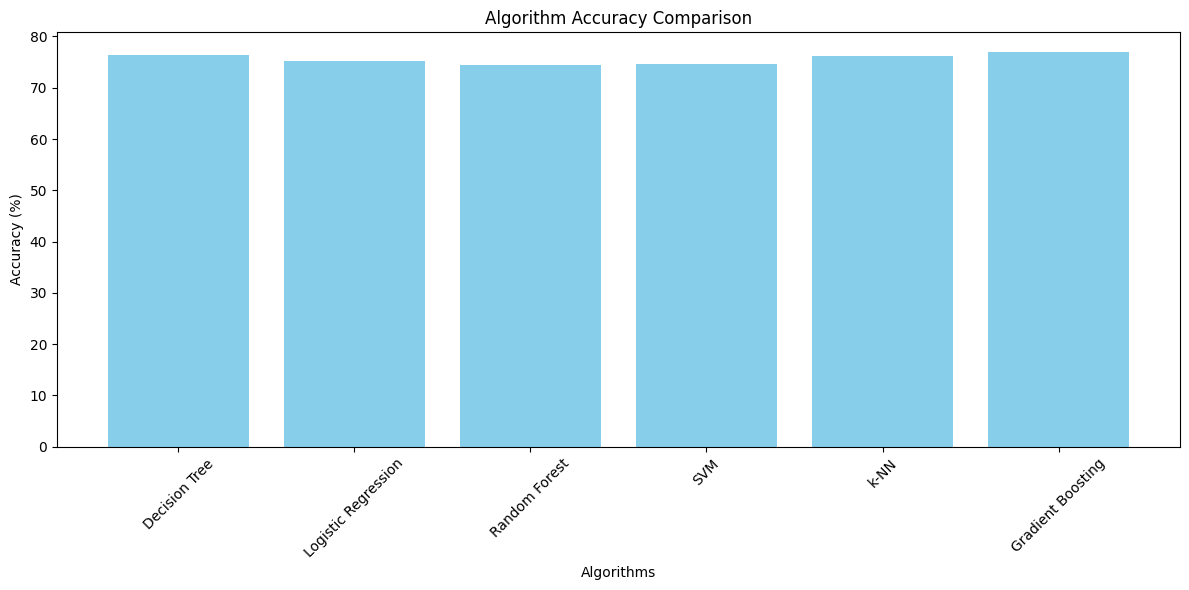

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithms and their accuracy scores
algorithms = list(results.keys())
accuracy_scores = [results[clf_name]['Accuracy (%)'] for clf_name in algorithms]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Algorithm Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

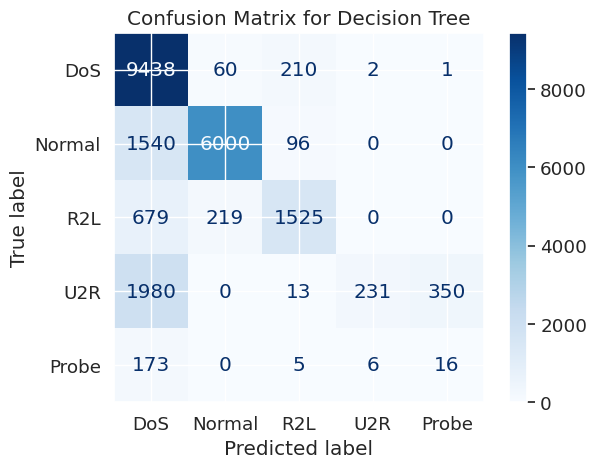

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'Decision Tree'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()


<Figure size 800x600 with 0 Axes>

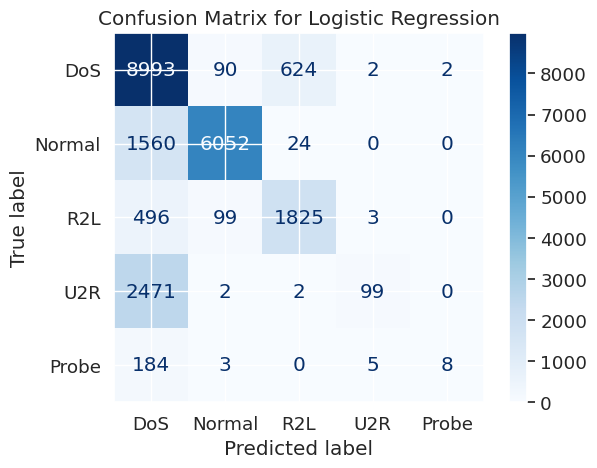

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'Logistic Regression'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()


<Figure size 800x600 with 0 Axes>

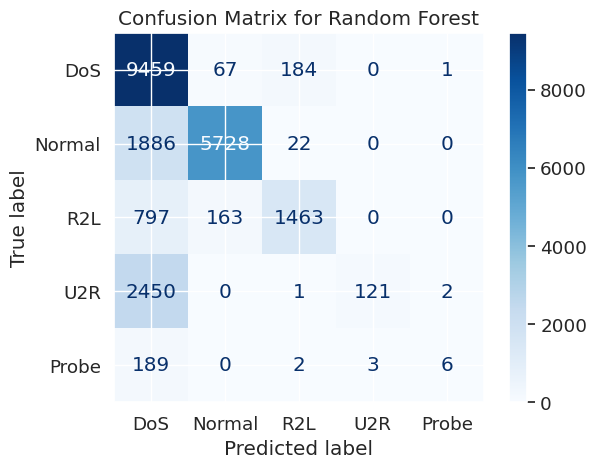

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'Random Forest'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()


<Figure size 800x600 with 0 Axes>

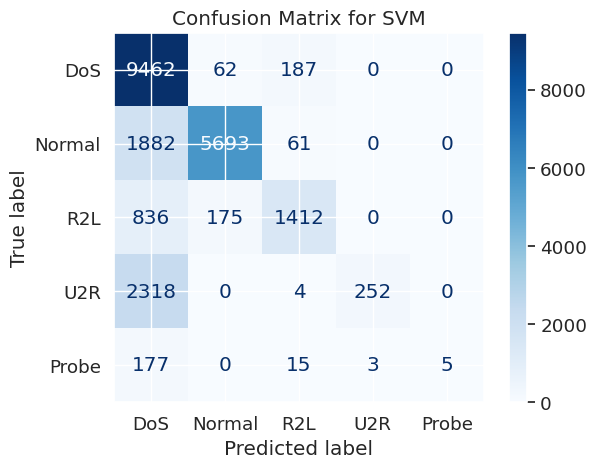

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'SVM'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()


<Figure size 800x600 with 0 Axes>

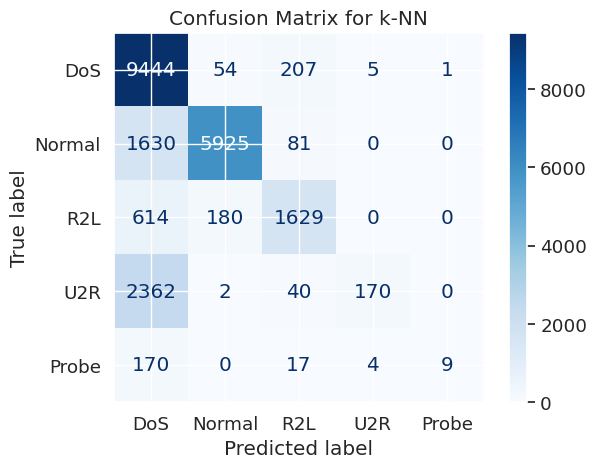

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'k-NN'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()


<Figure size 800x600 with 0 Axes>

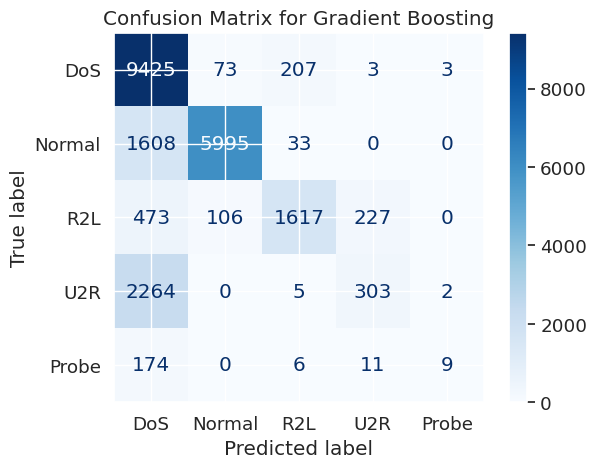

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Choose an algorithm (e.g., Decision Tree)
chosen_algorithm = 'Gradient Boosting'

# Get the confusion matrix for the chosen algorithm
conf_matrix = results[chosen_algorithm]['Confusion Matrix']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=attack_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for {chosen_algorithm}')
plt.show()
